## SUMMARY

`Makemore -` 
* Makes more of things that you give it.
* It is a simple charecter-level langugae model.
* Langugae model will predict next char in a sequence given some prior charecters before it. 
 
Uses `negative log likelihood` loss - 
* `log(abc) = log(a) + log(b) + log(c)`
* Because `log(1) = 0`, high probability words ~0
* But log `log(0) = -inf`, so low probability words <<0
* We want loss for low probability to be high when training
* Thus, we use `negative log`

`BiGram` model - 
* Predict next char based upon statistics of bigrams in train set.
* Model predicts the probability of the next charecter.

`NN` model -
* Encode N input chars: `xenc = F.one_hot(xs,num_classes=27).float()`
* Then pass to weight: `W = torch.randn(27, num_neurons)`
* Raw values: `logits = xenc @ W`

`Softmax` layer from logits to probabilities -
* `counts = logits.exp()`
* `probs = counts / counts.sum(axis=1,keepdims = True)`
* With prob, we can compute NLL: `loss = -probs[torch.arange(num),ys].log().mean() + 0.01*(W**2).mean()`
* This is intuitive: **We aggregate (sum or mean) the log probabilities associated with the true labels.**

Thus: NLL is good for classification problems.

In [6]:
words = open('names.txt', 'r').read().splitlines()
print(len(words))
# Shortest and longest words -
print(min([len(w) for w in words]))
print(max([len(w) for w in words]))

32033
2
15


Bigram - 
* `Input`: 1 char (given)
* `Predict`: Next char 
* Use statistical structure of langugae to build the model 

In [7]:
# Dict to store bigram counts
b = {}
for w in words:
    # Create start and end chrs 
    chs = ['<S>'] + list(w) + ['<E>']
    for ch1, ch2 in zip(chs,chs[1:]):
        bigram = (ch1,ch2)
        # Return 0 if bigram is not in the dict
        # Log the count of each bigram
        b[bigram] = b.get(bigram,0) + 1
        # print(ch1,ch2)

In [8]:
# Counts of bigrams across all words 
# Tuple of all key, value
# Sort by default on the first item of the tuple, so we return the second item in kv pair for sorting
sorted(b.items(), key = lambda kv: -kv[1])

[(('n', '<E>'), 6763),
 (('a', '<E>'), 6640),
 (('a', 'n'), 5438),
 (('<S>', 'a'), 4410),
 (('e', '<E>'), 3983),
 (('a', 'r'), 3264),
 (('e', 'l'), 3248),
 (('r', 'i'), 3033),
 (('n', 'a'), 2977),
 (('<S>', 'k'), 2963),
 (('l', 'e'), 2921),
 (('e', 'n'), 2675),
 (('l', 'a'), 2623),
 (('m', 'a'), 2590),
 (('<S>', 'm'), 2538),
 (('a', 'l'), 2528),
 (('i', '<E>'), 2489),
 (('l', 'i'), 2480),
 (('i', 'a'), 2445),
 (('<S>', 'j'), 2422),
 (('o', 'n'), 2411),
 (('h', '<E>'), 2409),
 (('r', 'a'), 2356),
 (('a', 'h'), 2332),
 (('h', 'a'), 2244),
 (('y', 'a'), 2143),
 (('i', 'n'), 2126),
 (('<S>', 's'), 2055),
 (('a', 'y'), 2050),
 (('y', '<E>'), 2007),
 (('e', 'r'), 1958),
 (('n', 'n'), 1906),
 (('y', 'n'), 1826),
 (('k', 'a'), 1731),
 (('n', 'i'), 1725),
 (('r', 'e'), 1697),
 (('<S>', 'd'), 1690),
 (('i', 'e'), 1653),
 (('a', 'i'), 1650),
 (('<S>', 'r'), 1639),
 (('a', 'm'), 1634),
 (('l', 'y'), 1588),
 (('<S>', 'l'), 1572),
 (('<S>', 'c'), 1542),
 (('<S>', 'e'), 1531),
 (('j', 'a'), 1473),
 (

In [9]:
import torch
a = torch.zeros((3,5))
# Single precision FP (32 bits in memory)
a.dtype

torch.float32

In [10]:
import matplotlib.pyplot as plt
N = torch.zeros((28,28),dtype=torch.int32)
# All chars
chars = sorted(list(set(''.join(words))))
# Lookup int to char 
stoi = {s:i for i,s in enumerate(chars)}
stoi['.'] = 0
stoi['<S>'] = 26
stoi['<E>'] = 27
itos = {i:s for s,i in stoi.items()}

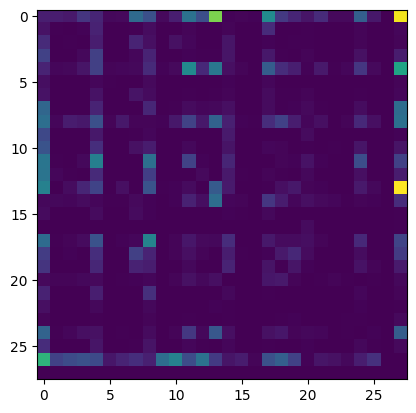

In [11]:
b = {}
for w in words:
    # create start and end chrs 
    chs = ['<S>'] + list(w) + ['<E>']
    for ch1, ch2 in zip(chs,chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        N[ix1,ix2] += 1
plt.imshow(N)

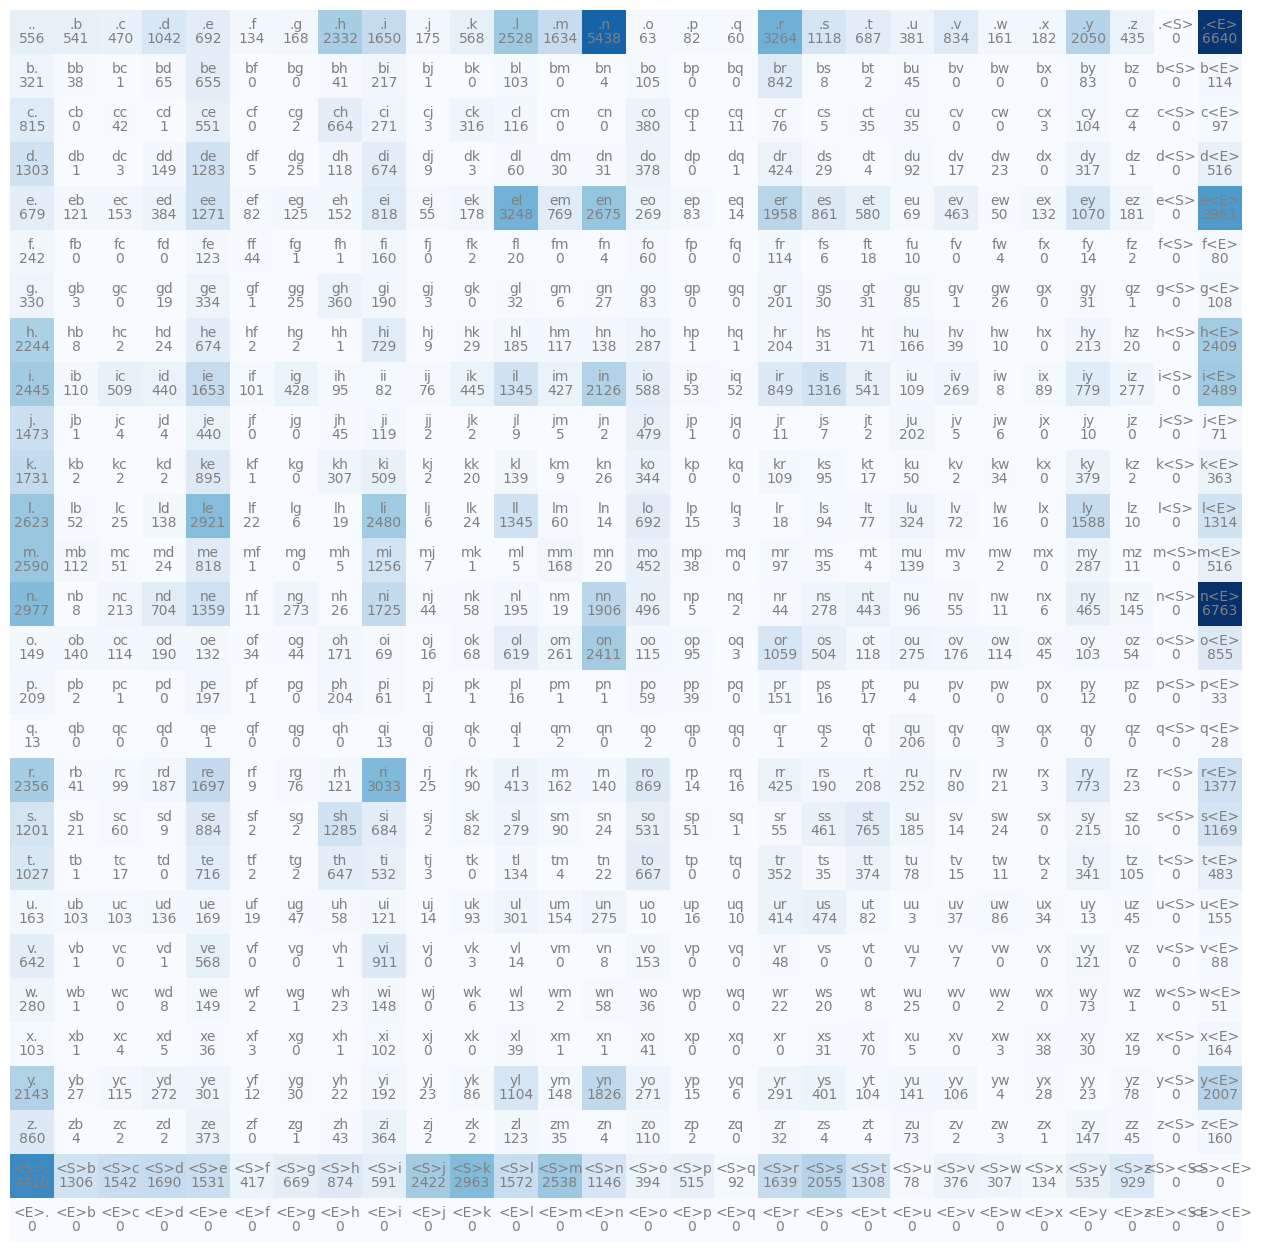

In [12]:
plt.figure(figsize=(16,16))
plt.imshow(N, cmap='Blues')
for i in range(28):
    for j in range(28):
        chstr = itos[i] + itos[j]
        plt.text(j, i, chstr, ha="center", va="bottom", color='gray')
        plt.text(j, i, N[i, j].item(), ha="center", va="top", color='gray')
plt.axis('off');

Let's clean this up ...

In [13]:
N = torch.zeros((28,28),dtype=torch.int32)
# Lookup int to char
# First char A starts at 1
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}

In [14]:
b = {}
for w in words:
    # create start and end chrs 
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs,chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        N[ix1,ix2] += 1

* Top row is count for all first letters
* In between is counts array of dataset 

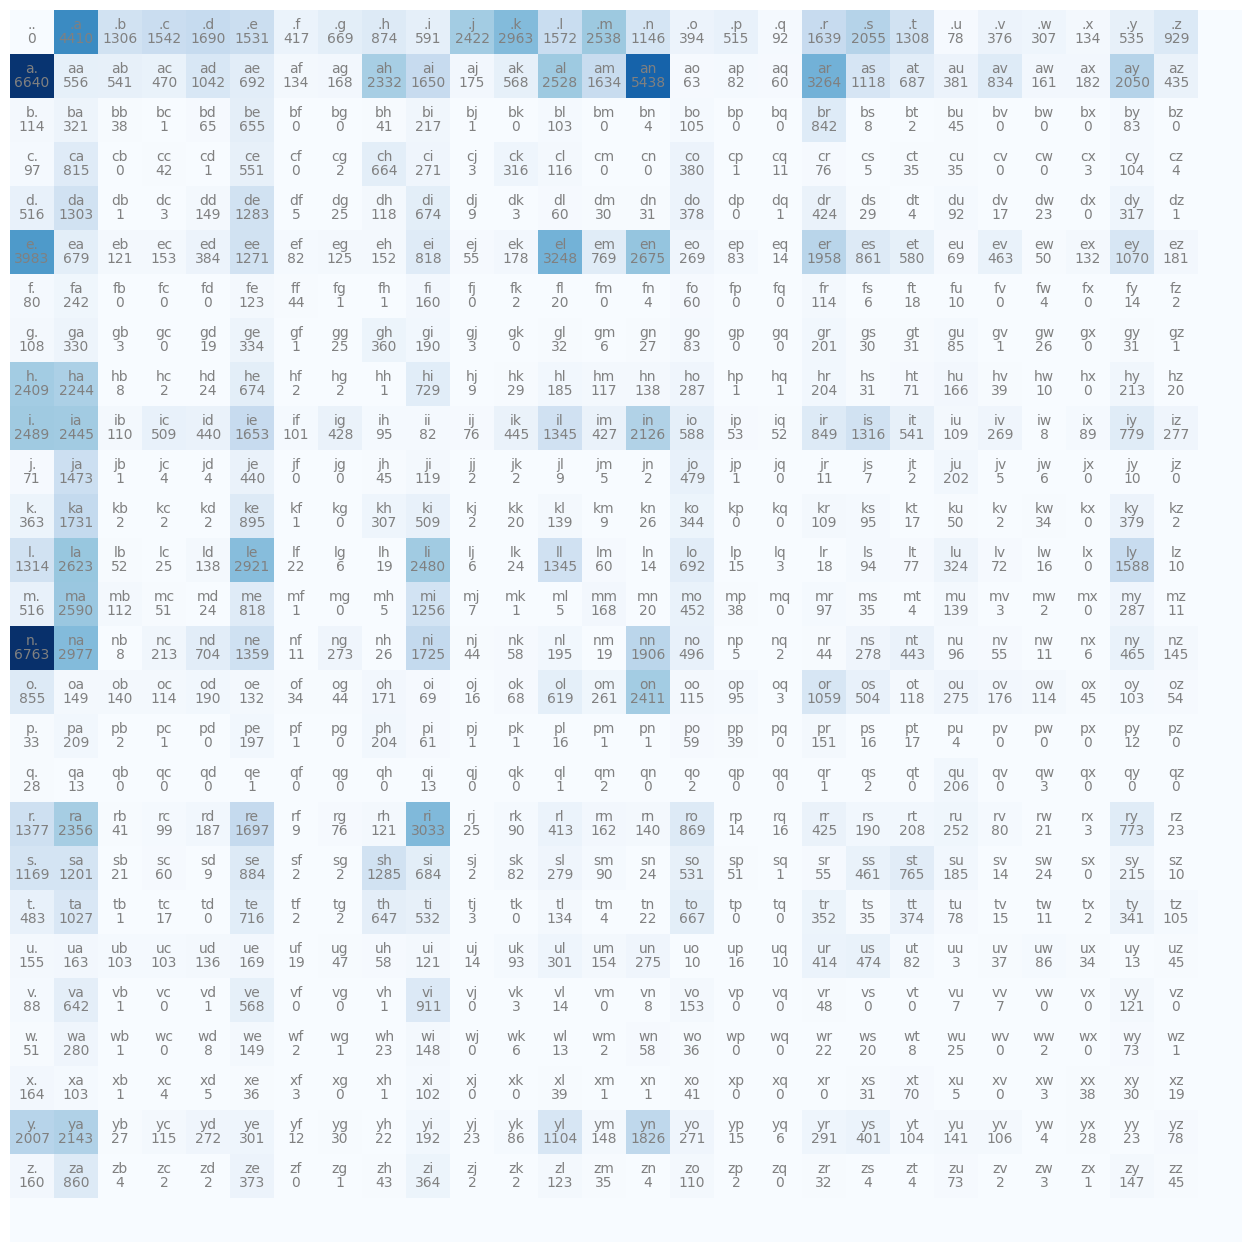

In [15]:
plt.figure(figsize=(16,16))
plt.imshow(N, cmap='Blues')
for i in range(27):
    for j in range(27):
        chstr = itos[i] + itos[j]
        plt.text(j, i, chstr, ha="center", va="bottom", color='gray')
        plt.text(j, i, N[i, j].item(), ha="center", va="top", color='gray')
plt.axis('off');

Use `torch.multinomial` to return a distribution of int specified by above P distribution.

https://pytorch.org/docs/stable/generated/torch.multinomial.html

A Generator can make results determinisic.

In [16]:
g = torch.Generator().manual_seed(2147483647)
# Pass g to function that creates 3 random numbers using generator as soruce of randomness
p = torch.rand(3, generator=g)
print(p / p.sum())
# Draw samples: In 20 samples, expect ~60%: 0, ~30%: 1, ~9%: 2
torch.multinomial(p, num_samples=20, replacement=True, generator=g)

tensor([0.6064, 0.3033, 0.0903])


tensor([1, 1, 2, 0, 0, 2, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1])

Word generator 

In [17]:
# Probablity of first char of the word
p = N[0].float()
p = p / p.sum()
ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
print(ix, itos[ix])

11 k


Makes sense; `k` is a fairly likely letter to draw. 

You can see bigram language model is not very accurate.
 
* It has no history. 
* e.g., h is fairly likely to be the end of a word.
* Model does not know that h is the first letter. 

But, is is better than random `p = torch.ones(27) / 27`

In [18]:
# Divide all rows by their sums 
# Can provide dim that we want to sum (rows = 0)
P = N.float()
# Column vector (27, 1)
P.sum(1,keepdim=True)

tensor([[32033.],
        [33885.],
        [ 2645.],
        [ 3532.],
        [ 5496.],
        [20423.],
        [  905.],
        [ 1927.],
        [ 7616.],
        [17701.],
        [ 2900.],
        [ 5040.],
        [13958.],
        [ 6642.],
        [18327.],
        [ 7934.],
        [ 1026.],
        [  272.],
        [12700.],
        [ 8106.],
        [ 5570.],
        [ 3135.],
        [ 2573.],
        [  929.],
        [  697.],
        [ 9776.],
        [ 2398.],
        [    0.]])

**Study Broadcasting semantics carefully**

https://pytorch.org/docs/stable/notes/broadcasting.html

In [19]:
# Broadcasting
# 27 27 (values)
# 27 1  (row-wise sum)
# What is does: Copies 1 to match 27
# Effectivly dividing each count in the column bu row-wise sum, (normalizing each row)
# But, avoid this b/c it creates a new tensor
P = P / P.sum(1,keepdim=True)

In [20]:
# Do in place operations, if possible!
P /= P.sum(1,keepdim=True)

In [21]:
g = torch.Generator().manual_seed(2147483647)
for i in range(5):
    out = []
    ix = 0
    while True:
        
        p = P[ix]
        # Everything equally likely (*no training*)
        # p = torch.ones(27) / 27
        # Normalize to sum to 1
        # p = p / p.sum()
        
        # Tell us what index will come next 
        ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
        out.append(itos[ix])
        
        # End token
        if ix == 0:
            break
    print(''.join(out))

mor.
axx.
minaymoryles.
kondlaisah.
anchshizarie.


`GOAL`

Maximize likihood of the data with respect to the model params. 
 
* E.g., we have a word `andrej`. 

Model will assign a probability to each bigram:

* Random: 1/27. = `~4%` 
* Model predicting what comes next in the sequence, since value >> `~4%`

Total probability can be just the product of the bigrams:

* But, the product of raw probabilities is annoyingly small.

The product of log probabilities is the sum of log of each:

`log(abc) = log(a) + log(b) + log(c)`

`Log(probability)`:

* Log(1) = 0
* Log(0) = -inf
* Higher prob ~0

A lower prob is very negative, since if converges to `-inf` for low probabilities.
 
We want lower prob to be very positive (high loss).

So, we use `negative log liklihood` as a loss:

* Lowest it can be is `zero`
* Thus we `minimize the negative log liklihood`

In [22]:
log_likelihood = 0.0
n=0

for w in words[:3]:
    
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs,chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        prob = P[ix1,ix2]
        logprob = torch.log(prob)
        log_likelihood += logprob
        n+= 1
        print(f'{ch1}{ch2}: {prob:.4f} {logprob:.4f}')

# Loss - 
print(f'{log_likelihood=}')
# Better loss function - 
nll=-log_likelihood
print(f'{nll=}')
# Normalized by count - 
print(f'{nll/n}')

.e: 0.0478 -3.0408
em: 0.0377 -3.2793
mm: 0.0253 -3.6772
ma: 0.3899 -0.9418
a.: 0.1960 -1.6299
.o: 0.0123 -4.3982
ol: 0.0780 -2.5508
li: 0.1777 -1.7278
iv: 0.0152 -4.1867
vi: 0.3541 -1.0383
ia: 0.1381 -1.9796
a.: 0.1960 -1.6299
.a: 0.1377 -1.9829
av: 0.0246 -3.7045
va: 0.2495 -1.3882
a.: 0.1960 -1.6299
log_likelihood=tensor(-38.7856)
nll=tensor(38.7856)
2.424102306365967


Bigram langugae model: 

* "Trained" on known words (counts of known words normalized

Test on a word of interest.

* `andrej`: Unlikely due to low probability of `ej`: 3.03
* `andrejq`: Very unlikely due to 0 probability of `jq`: `-inf` (`jq` is `zero`)

We can smooth this out by adding a default count of 1 to everything.

In [23]:
# Smooth model
# Remove zeros from probability matrix
smoothing = 1
P = (N+smoothing).float()
P /= P.sum(1,keepdim=True)

log_likelihood = 0.0
n=0

# Predicts a low, but finite probability for rare (jq) pairs
for w in ["andrej"]:
    
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs,chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        prob = P[ix1,ix2]
        logprob = torch.log(prob)
        log_likelihood += logprob
        n+= 1
        print(f'{ch1}{ch2}: {prob:.4f} {logprob:.4f}')

# Loss - 
print(f'{log_likelihood=}')
# Better loss function - 
nll=-log_likelihood
print(f'{nll=}')
# Normalized by count - 
print(f'{nll/n}')

.a: 0.1376 -1.9835
an: 0.1604 -1.8302
nd: 0.0384 -3.2595
dr: 0.0769 -2.5648
re: 0.1334 -2.0144
ej: 0.0027 -5.9004
j.: 0.0246 -3.7054
log_likelihood=tensor(-21.2582)
nll=tensor(21.2582)
3.0368807315826416


Do this with Neural Network - 

* Creat train set w/ all bigrams

In [24]:
# create training set of bigrams (x,y)
xs, ys = [] , []

for w in words[:1]:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs,chs[1:]):
        ix1=stoi[ch1]
        ix2=stoi[ch2]
        print(ch1,ch2)
        xs.append(ix1)
        ys.append(ix2)

. e
e m
m m
m a
a .


APIs - 

* you can use `torch.tensor` and `torch.Tensor` to create a tensor
* `Tensor` assumes dtype `float32`
* `tensor` assumes dtype `int`

In [25]:
# Use Torch API
xs = torch.tensor(xs)
ys = torch.tensor(ys)

Now we have a simple dataset w/ 5 input examples.

So, when `ix=5=e` is put into the model, we want `ix=13=m` to have a high probability.

In [26]:
print(xs)
print(ys)

tensor([ 0,  5, 13, 13,  1])
tensor([ 5, 13, 13,  1,  0])


Example are intergers (index to chars), so how to plug them into Neural network?

We can use `1-hot-encoding` to re-cast ints. 

* Int 13 will be a tensor w/ zeros and a 1 at 13th index (13th bit is on).
* Encode ints into `vectors`.

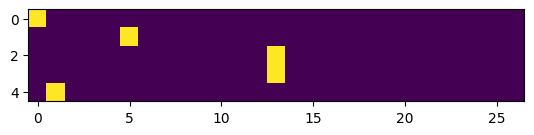

In [27]:
import torch.nn.functional as F
xenc = F.one_hot(xs,num_classes=27).float()
plt.imshow(xenc)

Be careful of data type:

* We want `float32`

`Mat mul` in Pytortch:
* Input: `(5, 27)` @ Weight: `(27, 1)`
* The 27 products all sum

As discussed, a neuron is simply:

* `weight` * `input` + `bias` 
* non-linearity
 
In this case, we choose a simplified neuron:

* `weights`, but no bias or non-linearity 
* Feed all 5 input into the same Neuron in parallel evaluate them 
* And no other layers

So this is a neural network with a single, linear layer.

In [28]:
num_neurons = 1
W = torch.randn(27, num_neurons)
result = xenc @ W
print(result.shape)

torch.Size([5, 1])


In [29]:
num_neurons = 27
# Normal distribution of a random distribution 
W = torch.randn(27, num_neurons)
result = xenc @ W
print(result.shape)

torch.Size([5, 27])


This result gives us the firing rate of `num_neurons` on each example!

e.g., the firing rate of the 13th neuron looking at the 3rd input.

Dot product of 3rd `input` w/ 13th column (neuron) in the weight matrix. 

In [30]:
print(result[3,13])
print(sum(xenc[3,:] * W[:,13]))

tensor(-0.5674)
tensor(-0.5674)


Exp to produce positive values.

Interpet as log counts or `logits`.

The probability is just the `count normalized`.

Now, each row sums to 1.

Shape is 5 x 27.

NN produces a row per example. 

The row is simply probabilities: `the likelihood that each char comes next`.

Goal: 
* `Input`: `N` chars, one-hot-encoded, resulting `N` x 27
* `Label`: `N` correct next char
* `Model`: Single linear layer w/o bias or non-linearity
* `Neurons`: 27 neurons, giving a `weight` matrix (27 x 27) 
* `Output`: `logits` are product of input x `weight` (5, 27), which are exponentiated to `counts` and noramlized
* `Optimize`: Find set of weights that product reasonable guess for next char

Last two lines are `softmax` and make a NN output probability:

* Take outputs of a NN, positive or negative
* And output a probability distribution (sums to 1)

In [31]:
xenc = F.one_hot(xs,num_classes=27).float()
logits = xenc @ W
counts = logits.exp()
probs = counts / counts.sum(axis=1,keepdims = True)
probs.shape

torch.Size([5, 27])

Now, we can have a look at bigram model.

We can see it does fairly poorly, w/ `~3%` liklihood in 4 out of 5 training examples!  

In [32]:
nlls = torch.zeros(5)
for i in range(5):
  # i-th bigram:
  x = xs[i].item() # input character index
  y = ys[i].item() # label character index
  print('--------')
  print(f'bigram example {i+1}: {itos[x]}{itos[y]} (indexes {x},{y})')
  print('input to the neural net:', x)
  print('output probabilities from the neural net:', probs[i])
  print('label (actual next character):', y)
  p = probs[i, y]
  print('probability assigned by the net to the the correct character:', p.item())
  logp = torch.log(p)
  print('log likelihood:', logp.item())
  nll = -logp
  print('negative log likelihood:', nll.item())
  nlls[i] = nll
print('=========')
print('average negative log likelihood, i.e. loss =', nlls.mean().item())

--------
bigram example 1: .e (indexes 0,5)
input to the neural net: 0
output probabilities from the neural net: tensor([0.0421, 0.0605, 0.0033, 0.0162, 0.3062, 0.0081, 0.0695, 0.0254, 0.0146,
        0.0235, 0.0075, 0.0084, 0.0173, 0.0560, 0.0080, 0.0386, 0.0108, 0.0331,
        0.0115, 0.0722, 0.0591, 0.0210, 0.0136, 0.0181, 0.0098, 0.0394, 0.0062])
label (actual next character): 5
probability assigned by the net to the the correct character: 0.008065914735198021
log likelihood: -4.820107936859131
negative log likelihood: 4.820107936859131
--------
bigram example 2: em (indexes 5,13)
input to the neural net: 5
output probabilities from the neural net: tensor([0.0032, 0.0132, 0.0625, 0.0354, 0.0114, 0.0308, 0.0884, 0.0133, 0.0952,
        0.1341, 0.0446, 0.0391, 0.0040, 0.0111, 0.0048, 0.0753, 0.0269, 0.0448,
        0.0145, 0.0094, 0.0144, 0.0798, 0.0116, 0.0179, 0.0280, 0.0513, 0.0350])
label (actual next character): 13
probability assigned by the net to the the correct character: 0

Instead, let's minimize the `loss` by tuning `W` - 

Compute the gradient of `W` wrt `loss`.

Very similar to what we did but micrograd, but:

* `Model`: There MLP, here single linear layer.
* `Loss`: There `regression` so used MSE (single number that quantified NN performance), here `classification` so used -log likelodd,
* `Backprop`: Populate gradient of all parameters (gradient points in direction increacing loss)
* `Update`: Nudge all parameters in opposite direction of gradient 

Pytorch tips:
 
* Most efficient to set gradient to `None` (rather than set to zero)
* We need to specify `requires_grad=True` for lead tensors
* Builds a graph prior to computing loss
* `loss.backward()` fills in gradients of all the intermediates

In [33]:
# Construct dataset of bigrams (x,y)
xs, ys = [] , []
for w in words:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs,chs[1:]):
        ix1=stoi[ch1]
        ix2=stoi[ch2]
        xs.append(ix1)
        ys.append(ix2)

# Data
xs = torch.tensor(xs)
ys = torch.tensor(ys)
num = xs.nelement()
print('number of examples: ', num)
        
# Randomly initialize 27 neuron weights
g = torch.Generator().manual_seed(2147483647)
num_neurons = 27
# Tell pytorch we want to compute gradient for this leaf tensor
W = torch.randn(27, num_neurons, generator=g, requires_grad=True)

number of examples:  228146


General format regardless of model (here, RNN, transformer):
    
* Input: previous char < or many previous chars > 
* Model: < simple to complex >, but always ... 
* Output: ... compute logits for next char in the sequence
* Optimization machinery: Same

Model:
* We can see that bigram does not scale easily to many chars. 
* It is currently just a 2D table. That's why we opt for neural networks.

Regularization:
* If all `W` are zero, logits all 0, exp all 1, P is uniform
* So, we augment loss w/ regularization
* It means: if W has non-zero numbers, we accumulate loss 
* "Gravity" force to the push the weight values to be more uniform. 

In [39]:
(-probs[torch.arange(num),ys].log()).shape

torch.Size([228146])

In [34]:
# Gradient descent
for k in range(100):

    # Take in previous char 
    xenc = F.one_hot(xs,num_classes=27).float()
    logits = xenc @ W
    counts = logits.exp()
    probs = counts / counts.sum(axis=1,keepdims = True)
    loss = -probs[torch.arange(num),ys].log().mean() + 0.01*(W**2).mean()
    print(loss.item())

    # Backward
    W.grad = None # set to zero
    loss.backward()

    # Update
    W.data += -50 * W.grad

3.768618583679199
3.3788068294525146
3.16109037399292
3.0271859169006348
2.9344842433929443
2.867231607437134
2.8166542053222656
2.777146577835083
2.7452542781829834
2.7188303470611572
2.696505546569824
2.6773719787597656
2.6608052253723145
2.6463515758514404
2.633664846420288
2.622471570968628
2.6125476360321045
2.6037068367004395
2.595794439315796
2.5886809825897217
2.5822560787200928
2.5764293670654297
2.5711236000061035
2.5662729740142822
2.5618228912353516
2.5577263832092285
2.5539441108703613
2.5504424571990967
2.5471925735473633
2.5441696643829346
2.5413522720336914
2.538722038269043
2.536262035369873
2.5339581966400146
2.531797409057617
2.529768228530884
2.527859926223755
2.5260636806488037
2.5243701934814453
2.522773265838623
2.521263837814331
2.519836902618408
2.5184857845306396
2.5172054767608643
2.515990734100342
2.5148372650146484
2.5137407779693604
2.512697696685791
2.511704921722412
2.5107579231262207
2.509854793548584
2.5089924335479736
2.5081682205200195
2.507380247116

Achieve oss of `2.47`, which is similar to what we go w/ counting! 